In [48]:
# Import libraries
import glob
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import datetime
from dateutil import parser
import seaborn as sns
from sklearn import preprocessing

In [49]:
df = pd.read_csv("./Draft Cleaned Merged.csv")
df.head()

,Unnamed: 0,time,depth,latitude,longitude,Tdir,Tper,Thgt,sdir,sper,...,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass,Exist
0,0,2022-06-30T00:00:00Z,0.0,17.0,114.5,198.0,6.024096,0.79,213.0,5.9,...,IMO9262223,ZCDO2,80.0,0.0,288.0,48.0,12.3,82.0,A,True
1,1,2022-06-30T00:00:00Z,0.0,17.0,114.5,198.0,6.024096,0.79,213.0,5.9,...,IMO9262223,ZCDO2,80.0,0.0,288.0,48.0,12.3,82.0,A,True
2,2,2022-06-30T00:00:00Z,0.0,17.0,114.5,198.0,6.024096,0.79,213.0,5.9,...,IMO9262223,ZCDO2,80.0,0.0,288.0,48.0,12.3,82.0,A,True
3,3,2022-06-30T00:00:00Z,0.0,17.0,114.5,198.0,6.024096,0.79,213.0,5.9,...,IMO9262223,ZCDO2,80.0,0.0,288.0,48.0,12.3,82.0,A,True
4,4,2022-06-30T00:00:00Z,0.0,17.0,114.5,198.0,6.024096,0.79,213.0,5.9,...,IMO9262223,ZCDO2,80.0,0.0,288.0,48.0,12.3,82.0,A,True


In [50]:
x = df[df['SOG'] > 0.0]

In [51]:
y = df["SOG"]
x = df.drop(["Status", "VesselName", "IMO", "CallSign", "latitude", "longitude", "time", "BaseDateTime", "MMSI", "TransceiverClass", "Exist", "depth"], axis = 1)

In [52]:
x.corr(method ='pearson').sort_values(["SOG"], ascending=False)[["SOG"]]

,SOG
SOG,1.000000
Unnamed: 0,0.284563
wdir,0.212030
COG,0.186954
Tper,0.146561
sper,0.135540
Tdir,0.130290
sdir,0.122745
Draft,-0.006700
shgt,-0.046900


In [53]:
x.corr(method ='pearson').sort_values(["SOG"], ascending=False)[["SOG"]]

,SOG
SOG,1.000000
Unnamed: 0,0.284563
wdir,0.212030
COG,0.186954
Tper,0.146561
sper,0.135540
Tdir,0.130290
sdir,0.122745
Draft,-0.006700
shgt,-0.046900


In [54]:
x = df.drop(["Status", "VesselName", "IMO", "CallSign", "latitude", "longitude", "time", "BaseDateTime", "MMSI", "TransceiverClass", "Exist", "depth", "Draft", "shgt", "Heading", "Thgt", "whgt", "wper", "Unnamed: 0"], axis = 1)

In [62]:
normalized = (x-x.min())/(x.max()-x.min())


In [63]:
normalized

,Tdir,Tper,sdir,sper,wdir,SOG,COG,VesselType,Length,Width,Cargo
0,0.931973,0.0,0.945783,0.250667,0.606383,0.094819,0.340278,0.830508,0.852459,0.777778,0.864407
1,0.931973,0.0,0.945783,0.250667,0.606383,0.094819,0.338611,0.830508,0.852459,0.777778,0.864407
2,0.931973,0.0,0.945783,0.250667,0.606383,0.095797,0.336667,0.830508,0.852459,0.777778,0.864407
3,0.931973,0.0,0.945783,0.250667,0.606383,0.095797,0.337500,0.830508,0.852459,0.777778,0.864407
4,0.931973,0.0,0.945783,0.250667,0.606383,0.096774,0.337778,0.830508,0.852459,0.777778,0.864407
...,...,...,...,...,...,...,...,...,...,...,...
5843,0.095238,1.0,0.090361,0.968000,1.000000,0.157380,0.684444,0.491525,0.537705,0.388889,0.491525
5844,0.095238,1.0,0.090361,0.968000,1.000000,0.115347,0.795556,0.661017,0.396721,0.296296,0.694915
5845,0.095238,1.0,0.090361,0.968000,1.000000,0.114370,0.752778,0.661017,0.396721,0.296296,0.694915
5846,0.095238,1.0,0.090361,0.968000,1.000000,0.102639,0.760833,0.661017,0.301639,0.203704,0.661017


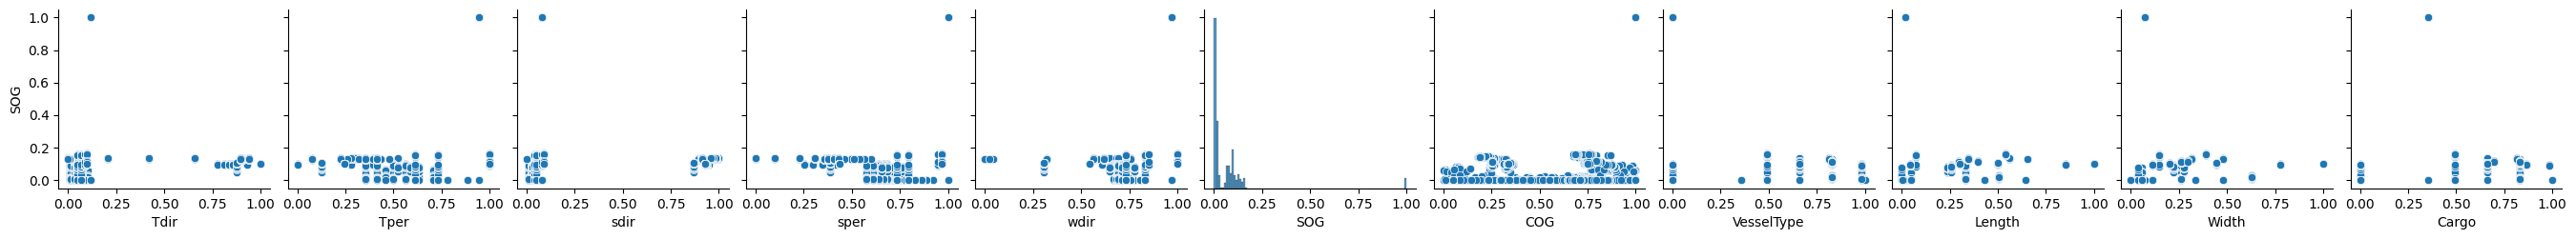

In [71]:
sns.pairplot(normalized, y_vars=["SOG"])

Text(0.5, 1.0, 'Correlation')

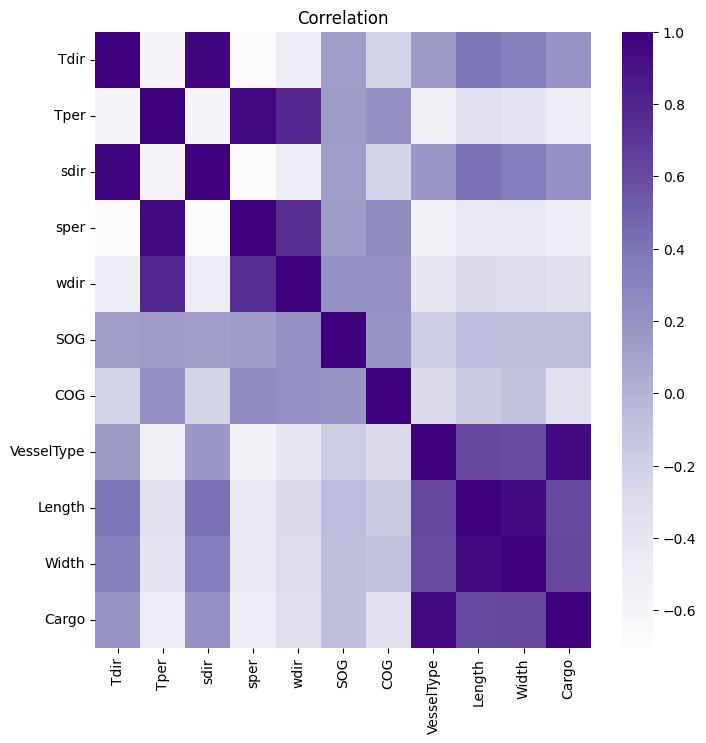

In [72]:
# using heatmap to find correlation
plt.figure(figsize=(8,8))
heatmap = sns.heatmap(x.corr(method ='pearson'), cmap="Purples")
heatmap.set_title("Correlation")